# Module 5: Training Models and Feature Selection

# Introduction

In previous modules, we have seen several machine learning models and training algorithms. In this module, we will consider the approaches to building predictive models and model evaluation strategies. We will discuss how to develop a model that best approximates _true_ dependence and how to select features that are most appropriate for the model. Regularization techniques will be introduced, which are designed to avoid overfitting and help with feature selection. 

# Learning Outcomes

In this module, you will:

* Gain familiarity with different sources of error in the linear models
* Learn common methods of model tuning: how to select features and tune hyperparameters
* Learn the most important regularization techniques and apply alternative learning strategies to regression
* Evaluate learning models using learning curves
* Employ regularized regression for automatic feature selection (Lasso regression)

# Reading and Resources

We invite you to further supplement this notebook with the following recommended texts:

- Géron, A. (2019). Chapter 4: Training Models in *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O’Reilly Media. https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/


- Bishop, C.M. (2006). Chapter 3: Linear Models for Regression in _Pattern Recognition and Machine Learning._ Springer. https://www.microsoft.com/en-us/research/publication/pattern-recognition-machine-learning/


- James, G., Witten, D., Hastie, T., Tibshirani, R. (2013) Chapters 6: Linear Model Selection and Regularization and 10.2: Principal Components Analysis in _An Introduction to Statistical Learning._ Springer.


- Witten, I.H., Frank, E. (2005) Chapter 7: Transformations: Engeeniring the input and output in _Data Mining: Practical Machine Learning Tools and Techniques (3nd Edition)._ https://www.elsevier.com/books/data-mining-practical-machine-learning-tools-and-techniques/witten/978-0-12-374856-0


- Shaikh, R. (2018). Feature Selection Techniques in Machine Learning with Python. Towards Data Science. https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-5:-Training-Models-and-Feature-Selection" data-toc-modified-id="Module-5:-Training-Models-and-Feature-Selection">Module 5: Training Models and Feature Selection</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Reading-and-Resources" data-toc-modified-id="Reading-and-Resources">Reading and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Overview" data-toc-modified-id="Overview">Overview</a></span>
<ul class="toc-item">
<li><span><a href="#Multiple-regression" data-toc-modified-id="Multiple-regression">Multiple regression</a></span>
</li>
<li><span><a href="#Optimization-algorithms" data-toc-modified-id="Optimization-algorithms">Optimization algorithms</a></span>
<ul class="toc-item">
<li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent">Gradient Descent</a></span>
</li>
<li><span><a href="#Batch-Gradient-Descent" data-toc-modified-id="Batch-Gradient-Descent">Batch Gradient Descent</a></span>
</li>
<li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent">Stochastic Gradient Descent</a></span>
</li>
</ul>
</li>
<li><span><a href="#Polynomial-Curve-Fitting" data-toc-modified-id="Polynomial-Curve-Fitting">Polynomial Curve Fitting</a></span>
</li>
<li><span><a href="#Sources-of-error" data-toc-modified-id="Sources-of-error">Sources of error</a></span>
<ul class="toc-item">
<li><span><a href="#Noise" data-toc-modified-id="Noise">Noise</a></span>
</li>
<li><span><a href="#Bias" data-toc-modified-id="Bias">Bias</a></span>
</li>
<li><span><a href="#Variance" data-toc-modified-id="Variance">Variance</a></span>
</li>
<li><span><a href="#The-Bias-variance-tradeoff" data-toc-modified-id="The-Bias-variance-tradeoff">The Bias-variance tradeoff</a></span>
</li>
</ul>
</li>
<li><span><a href="#Overfitting-in-multi-variable-linear-regression" data-toc-modified-id="Overfitting-in-multi-variable-linear-regression">Overfitting in multi-variable linear regression</a></span>
</li>
<li><span><a href="#Feature-selection-approaches" data-toc-modified-id="Feature-selection-approaches">Feature selection approaches</a></span>
<ul class="toc-item">
<li><span><a href="#Subset-selection" data-toc-modified-id="Subset-selection">Subset selection</a></span>
<ul class="toc-item">
<li><span><a href="#All-subsets" data-toc-modified-id="All-subsets">All subsets</a></span>
</li>
<li><span><a href="#Stepwise-Selection" data-toc-modified-id="Stepwise-Selection">Stepwise Selection</a></span>
</li>
</ul>
</li>
</ul>
</li>
<li><span><a href="#Regularization" data-toc-modified-id="Regularization">Regularization</a></span>
<ul class="toc-item">
<li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression">Ridge Regression</a></span>
</li>
<li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression">Lasso Regression</a></span>
</li>
</ul>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Overview

In this module, we will begin by discussing some general issues concerning the building of predictive models. We can think of learning as improving performance on future tasks after making observations. Thus, our ability to make predictions is based on how well we can learn from examples. Here, we shall focus on the supervised learning models, where a collection of input-output pairs is given and the task is to learn a function that predicts the output for new inputs. Supervised learning might seem restricted but actually has vast applicability.

To do supervised learning we need a collection of N example input-output pairs

$$(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)$$

which we call the training set. Our mission is to find an approximation of the function $y = f(x)$, which generated the data in the first place and maps each input x to its corresponding output y. We're assuming we don't know what that function is; otherwise we could just plug in new values of x and get the corresponding value of y.

So, to build a predictive model is to find a function $h$ that approximates the true function $f(x)$. The function $h$ is a __hypothesis__, and learning consists of searching through different hypotheses to find one that will perform well. To measure the accuracy of a hypothesis, it is tested on on a __test set__. This test set is distinct from the training set; often the data set is split into thesetwo parts: the training set and test set, and the former is used for fitting the model and the latter for evaluating the model's accuracy on inputs it hasn't seen before. The hypothesis __generalizes__ well if it correctly predicts the value of output $y$ in test examples.

In real data sets, the input $x$ is usually a vector with many components: it might be a few, dozens or even thousands. For example, if we are asked to predict house prices, we will need to find many examples of sold houses and each example will need to have the price at which each house was sold (output value $y$) along with the many characteristics or features of that house: square footage, number of bedrooms, number of bathrooms, year built, year renovated etc. (collectively these comprise an input with $m$ features $(x_1, x_2, ..., x_m)$). In building the model, we may formulate different hypotheses with different numbers of features: one may include only square footage, for it might be the most important feature, or the model with two or more features will perform better, or maybe all available features should be included into the model. The more features are included, the more complex the model becomes; highly complex models will be more consistent with the data. However, as will be shown, high model complexity does not necessarily result in high model performance, and the fundamental problem of learning is how to choose from multiple consistent hypotheses. The most common approach is to prefer the _simplest_ hypothesis consistent with the data. This is the Occam's Razor Principle, which is used to keep our models as simple and effective as they can be. There is a tradeoff between complex hypotheses that fit the training data well and simpler hypotheses that may generalize better. ***Essentially, model selection is finding balance between the complexity and the goodness of fit***.

A good example of this is idea is a polynomial regression. In this case, the degree of polynomial defines the complexity level of the model. Higher degree polynomials can fit the training data better, but when the degree of the polynomial is too high they will overfit and will not generalize well. The fitting process will cause the polynomial to contort through extemely high and low values of y in order to get as close to all the points in the training set as possible, with the result that it will predict ridiculous y values for values of x between the ones its actually been trained on. To get a better result, the degree should be chosen to best balance between underfitting and overfitting, which will give the best test set accuracy.  

## Multiple regression
 
Let's consider multiple regression, which is linear regression with multiple features, where each feature is some function of either a single input, or multiple inputs. The concept of multiple regression is very important. It's the most widely used machine learning model type.

For a data set with $M$ input features, our goal is to find the best hypothesis of the form:

$$\hat{y} = w_0 + w_1 x_1 + ... + w_m x_m$$

* $\hat{y}$ is the predicted value;
* m is the number of features;
* $x_i$ is the $i^{th}$ feature value;
* $w_i$ is the $i^{th}$ model parameter (including the intercept $\theta_0$ and the feature weights $w_1, w_2, ..., w_m$).

This hypothesis can be written in concise vectorized form, since all parameters form a vector $w$: 

$$\hat{y} = h_{w}(\bar{x}) = w^T \cdot \bar{x}$$

* $\theta$ is the model's parameter vector, containing the intercept term $\theta_0$ and the feature weights $w_1, w_2, ..., w_m$, in the equation this vector is transposed; it is a row vector instead of a column vector;
* $\bar{x}$ is the instance's feature vector, it contains added feature $x_0$ to match the parameter vector $w$, $x_0$ always equal to 1;
* $h_{w}$ is the hypothesis function, using the model parameter $w$. 

Now, the task is to find the best hypothesis $h_w$ which means finding values of $w_i$ that best fit the model to the training set. As a measure of model performance, Mean Square Error (MSE) is the most commonly used. Mean squared error is the sum of the squares of the errors between the predictions $y(x_n, \bar{w})$ for each data point and the corresponding target values $y_n$:

$$\text{MSE}(\bar{w}) = \frac{1}{2 N}\sum_{n=1}^{N}[y(x_n, \bar{w}) - y_n]^2$$

Here, the sum is taken over all N instances in the training data set. Therefore, we need to find the value of $w$ that minimizes the $\text{MSE}$, and the linear regresssion algorithm was designed to find the minimum of this function of parameters $w$. Errors are squared for several reasons: errors are either positive or negative and we need to introduce a function that will add up errors of both signs. Sometimes the absolute value of errors is used. However, it is easier to find the minimum of the squared errors and can be shown mathematically to be the best way to define the error if the errors are normally distributed. 

As in the house price example, we may find that the house square footage is the most important feature and build a simple model which describes the relationship between square feet of a house and the output, which is the value of the house.

This would be a really simple linear regression model; in many cases we will have to use more complex functions of our input. The dependence might be non-linear, quadratic, or higher power. To build a better hypothesis we may add (square feet)^2 to our model as another feature. And if model performance will be non-satisfactory the (square feet)^3 can be added and we may keep adding higher power as new features to our model. This is the "polynomial regression" mentioned earlier.  In polynomial regression these different powers of x (square feet) are treated as features. We'll look at polynomial regression in more detail shortly.

## Optimization algorithms

As was indicated above, training the linear model consists of finding parameters $w_i$ that best approximate the true dependence. This is done by minimizing the error function, which is often called the **cost function**. Let's look at the different ways to train a linear regression model. The error (or cost) function $\text{MSE}(w)$ is a function of parameters $w_i$ since we sum over all instances and the problem is reduced to finding the minimum of the error function with respect to $w$. 

### Gradient Descent

**Gradient Descent** is one of the most used optimization algorithms; the general idea is to change parameters iteratively in order to minimize the cost function $\text{MSE}(\bar{w})$. $\text{MSE}$ is a quadratic function of $\bar{w}$ and has its global minimum at the bottom. To reach the minimum as quickly as possible, we need to move in the direction of the steepest downslope. Gradient Descent starts at some random point and it measures the local gradient (the slope at that point) with regards to the parameter vector $\bar{w}$. It the moves the point in the direction of steepest descent. Once the gradient is zero, a minimum is reached and the best parameter values $\bar{w}$ has been found.

   
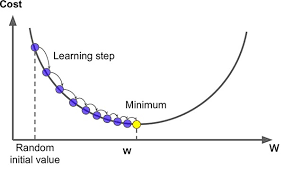

The algorithm is iterative. During each iteration the parameters are changed by a small step. The size of the step is determined by the **learning rate** hyperparameter. It is very important to choose an appropriate value for the learning rate. If the learning rate is too small, then the algorithm will have to go through many iterations to converge and the algorithm will take a long time to run. On the other hand, if the learning rate is too high, the algorithm might diverge with larger and larger values of $\bar{w}$. 

However, there have been a number of very reliable procedures discovered that will automatically adjust the learning rate. In Scikit-Learn's implementation of Gradient Descent, the learning rate is adjusted automatically.

### Batch Gradient Descent

If you're familiar with vector calculus, let's have a look at how gradient descent works. If not, you can safely skip this section.

In Gradient Descent, the gradient of the cost function has to be computed with regards to each model parameter $w_j$. Along each direction, $w_j$ partial derivatives $\frac{\partial}{\partial w_j}\text{MSE}(\bar{w})$ are computed:

$$\frac{\partial}{\partial w_j}\text{MSE}(\bar{w}) = \frac{2}{m}\sum_{i=1}^{N}(\bar{w}^T\bar{x}^{(i)} - y^{(i)})x_j^{(i)}$$

These partial derivatives are taken simultaneously in all directions and the gradient vector $\nabla_w \text{MSE}(\bar{w})$ is computed, which contains all the partial derivatives of the cost function:

$$\nabla_w \text{MSE}(\bar{w}) = \begin{pmatrix}
\frac{\partial}{\partial w_0}\text{MSE}(\bar{w})\\
\frac{\partial}{\partial w_1}\text{MSE}(\bar{w})\\
...\\
\frac{\partial}{\partial w_m}\text{MSE}(\bar{w})\\
\end{pmatrix}= \frac{2}{m}X^T(X\bar{w} - \bar{y})
$$

This formula involves calculations over the full training set $X$ at each gradient step. This gives the name to the algorithm &mdash; **Batch Gradient Descent** &mdash; as it uses the whole batch of training data at every step.

Once the gradient vector is computed, which points uphill, we need to change the parameter values $\bar{w}$ in the opposite direction. To find the next step value, the gradient vector $\nabla_w \text{MSE}(\bar{w})$ is multiplied by the learning rate $\eta$:

$$\bar{w}^{(next  step)} = \bar{w} - \eta \nabla_w \text{MSE}(\bar{w})$$

### Stochastic Gradient Descent

Batch Gradient Descent is powerful but it can be slow. The problem is that it uses every observation in the training set to compute the gradient at every step, which makes it very slow when the training set is large. To accelerate its computation, **Stochastic Gradient Descent (SGD)** was introduced. In this algorithm, a random instance is picked in the training set at every step and the gradient vector is computed only on that single instance. This gives a very crude estimate of the actual gradient at each step.  This is a much faster to compute, but rather than following the gradient directly to the minimum, the cost function will bounce up and down making the trip to the minimum less precise.  Some steps may even be in entirely the wrong direction but on average it will still move toward teh minimum.  When the algorithm stops, the final parameter values, although still likely very good, may not be the best possible.

To avoid this problem, we gradually reduce the learning rate, which is what helps the algorithm settle at the global minimum. This process is similar to **simulated annealing**, an algorithm inspired by annealing process in metallurgy. The function that determines the learning rate at each step is called the **learning schedule**.

We're only guaranteed of finding the global minimum if the cost function is parabolic like in ordinary least squares regression. For more complex cost functions, we have no guarantee that gradient descent won't get caught in a local minimum, but in practice this has rarely been a major issue.  The minima found are usually "good enough" to produce a useful model if the the independent variables are indeed predictive.

In Scikit-Learn linear regression using SGD can be performed with the `SGDRegressor` class. Also, there is a `SGDClassifier` class for classication tasks. Below is an example of SGDRegressor usage.

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1)
sgd_reg.fit(X, y)

There are two parameters that control the number of iterations, or when the algorithm stops: `max_iter` and `tol`.
`max_iter` sets the maximum number of iterations (or epochs), 1000 in the example, and `tol` is the tolerance to change of the function. The code will run for a maximum of 1000 epochs or until the loss drops by less than `1e-3` during one epoch. The starting value for the learning rate was set to `eta0=0.1`.

## Polynomial Curve Fitting

Not all data sets have linear relationships between the independent and dependent variables.

Let's consider a simple regression problem for non-linear data. Suppose we are given a training set comprising $N$ observations of $x$, written $\bar{x}=(x_1, ..., x_N)^T$, together with corresponding observations of the target values $\bar{y}=(y_1, ..., y_N)^T$. In this data set we have only a single feature, but the effect is has on y is not linear.  There may still be an underlying regularity or relationship between x and y, which we would like to learn, despite not being linear.  As is usually the case with real world data, we will assume the individual observations include some random noise. ("Noise" is our way of summarizing the influences of all the other factors on the target that we don't know about or know the value of).

We shall fit the data using a polynomial function of the form:

$$y(x) = w_0 + w_1 x_1 + w_2 x^2 + ... + w_m x^m = \sum_{j=0}^{m}w_j x^j$$

where $m$ is the order of the polynomial, and $x^j$ denotes $x$ raised to the power of $j$. The polynomial coefficients $w_0, w_1, ..., w_m$ are collectively denoted by the vector $\boldsymbol{w}$. Although the function $y(x)$ is a nonlinear function of $x$, it *is* a linear function of the coefficients $w$, and thus is still considered a kind of _linear model_. It may sound surprising that we are going to use a linear model to fit non-linear data, but in fact, in this fitting we are adding powers of $x$ as *new features*. The model will be trained on this extended set of features.  This technique is called **polynomial regression**.  We've in effect reduced a non-linear problem to one which is a linear combination of a larger number of parameters that can be trained in exactly the same way as ordinarly linear regression.  As usual we're interested in the values of the weights $w$ and what is the minimum set of weights from $w$ that we can get away with to give us a model that predicts well but is parsimonious (as simple as possible).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# poly_features = Polyno

Let's look at an example. We will work with the Boston house prices dataset. First, polynomial regression will be applied. Next, the most common errors will be discussed. Then we will select the features and tune our model. 

In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Boston house prices dataset from 'sklearn.datasets' collection

from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# This dataset comes with description, feature name, 
# data contains all feature values and target in a separate array
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print("Feature names:",boston.feature_names)

#Dataset description, to read data description uncomment the next line
#print(boston.DESCR)

Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
# Convert it into a DataFrame
boston_df = pd.DataFrame(boston.data)
#Change the column names from index numbers to 'feature_names'
boston_df.columns=boston.feature_names

#Add a column named 'PRICE' from boston.target
boston_df['PRICE']=boston.target
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# First we shall build model with a single feature
# We shall select 'the most important' feature, 
# this would be feature correlated to the target variable most
# To find it print the correlation matrix
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


This correlation matrix shows that the target variable `PRICE` is highly correlated with the `LSTAT` feature, the percentage of lower status of the population. First, we will build a predictive model with the single feature `LSTAT`.

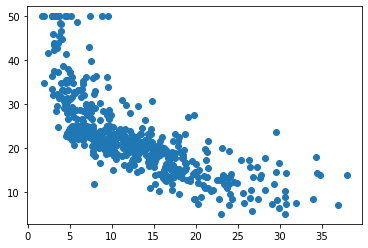

In [7]:
boston_df_st = boston_df.sort_values(by=['LSTAT']).reset_index()


plt.scatter(boston_df.LSTAT, boston_df.PRICE)

In [8]:
y = boston_df_st['PRICE']
X_single = boston_df_st[['LSTAT']]

X=boston_df_st[boston.feature_names]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_single,y,test_size=0.3,random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

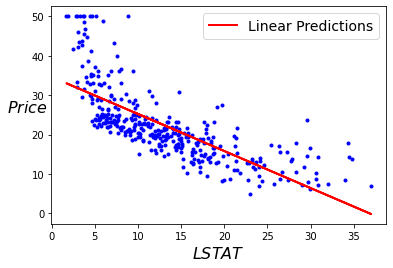

In [11]:
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "b.")
plt.plot(X_train, y_train_pred, "r-", linewidth=2, label="Linear Predictions")

plt.xlabel("$LSTAT$", fontsize=16)
plt.ylabel("$Price$", rotation=0, fontsize=16)
plt.legend(loc="upper right", fontsize=14)


plt.show()

The straight line does not fit this data properly so let's try polynomial regression for a non-linear fit. To implement it, let's use Scikit-Learn's `PolynomialFeatures` class to transform our training set, adding the square of each feature in the training set as a new feature. Fow now we'll continue to work with just `LSTAT`.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features_2.fit_transform(X_single)
print('The first value of feature X before transformation {}'.format(X_single.loc[0]))
print('and after {}'.format(X_poly_2[0]))

The first value of feature X before transformation LSTAT    1.73
Name: 0, dtype: float64
and after [1.73   2.9929]


Now, `X_poly_2` contains the original feature `X_poly` and its square as a new feature. 

In [13]:
lin_reg_2 = LinearRegression()

lin_reg_2.fit(X_poly_2, y)
y_pred_2 = lin_reg_2.predict(X_poly_2)

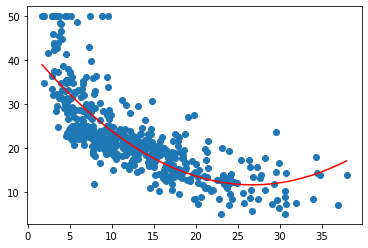

In [14]:
plt.scatter(boston_df.LSTAT, boston_df.PRICE)
plt.plot(X_single, y_pred_2, color='r')

If a second order polynomial works better, why not try a higher power?  Let's try 12:

In [15]:
poly_features_12 = PolynomialFeatures(degree=12, include_bias=False)
X_poly_12 = poly_features_12.fit_transform(X_single)

lin_reg_12 = LinearRegression()

lin_reg_12.fit(X_poly_12, y)

y_pred_12 = lin_reg_12.predict(X_poly_12)


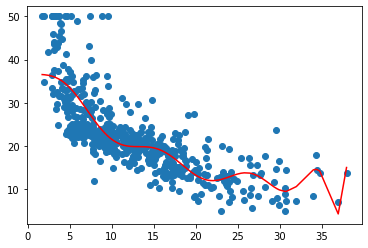

In [16]:
plt.scatter(boston_df.LSTAT, boston_df.PRICE)
plt.plot(X_single, y_pred_12, color='r')

With higher degree polynomials, the curve becomes a bit wiggly, as the model finds a better fit for the training data, trying to get as close as possible to the training instances. Adding a new feature  or increasing the order of  the polynomial will likely produce a better fit and the training error decreases. However, this high-degree Polynomial Regression is severely __overfitting__ the training data, whereas the linear model was __underfitting__ it. It's trying to follow gyrations in the data more closely, and as a result is reacting more to the noise in the data and fitting to that noise than the lower degree example was.

It is very difficult to choose the best model by judging the training error only. Adding new features will make training error smaller and smaller, and at some level of model complexity adding new features won't improve the fit further. The best way to evaluate the model though is not how it fits the training data, it's to check how well it generalizes. The instances should be split into train and test subsets, so that we can do fitting on the training subset and then predict the test portion of the dataset to see how well it does vs. the actual test set y values.

If a model performs well on the training data but generalizes poorly then the model is overfitting, if it performs poorly on both, then it is underfitting. This is one way to find when a model is too simple or too complex.

Now, we will try to find the best polynomial regression model for our example. Below, several models with different degrees of polynomials are fitted, and then the test portion of the data is predicted. For each model, both training and testing errors are computed. 

Text(0, 0.5, 'RMSE')

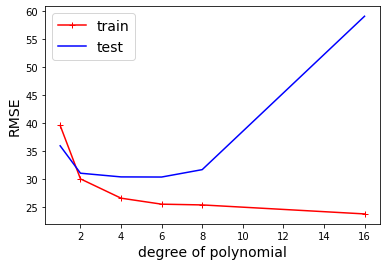

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
poly_degrees = [1, 2, 4, 6, 8, 16]

train_errors, test_errors = [], []

for i in poly_degrees:
    poly_features = PolynomialFeatures(degree = i, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_train_pred = poly_regression.predict(X_train)
    y_test_pred = poly_regression.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
plt.plot(poly_degrees, train_errors, "r-+", label="train")
plt.plot(poly_degrees, test_errors, "b-", label="test")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("degree of polynomial", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

The graph shows that the linear model (`degree = 1`) performs poorly for both train and test subsets. For a more complex model with higher degree polynomials, the training error decreases, but the test error has a minimum value around the 2nd through 8th degrees and then steeply increases. This test error increase indicates overfitting and we should pick the model with the second degree, as it generalizes well (i.e. it does a good job of prediction on input data it hasn't seen before) and has the smallest degree that still gives a good predictive result. 

We were able to detect the overfitting in this example, but the overfitting might be much worse with a different dataset. This dataset is quite dense and the high-degree curve does not wiggle much. For dense data, the curve might get 'pinned' to the data. When the data set is less dense, or multiple features are considered simultaneously, the data along each dimension will be more sparse. In this case the fit is more prone to overfit. For illustration, we shall rarify the dataset by picking each 10th row and repeating the polynomial regression using this less dense dataset.

In [18]:
df_boston_2f = boston_df_st[['LSTAT', 'PRICE']]


df_boston_2f_one = df_boston_2f.iloc[::10, :]

X_poly_one = df_boston_2f_one[['LSTAT']]
y_poly_one = df_boston_2f_one['PRICE']


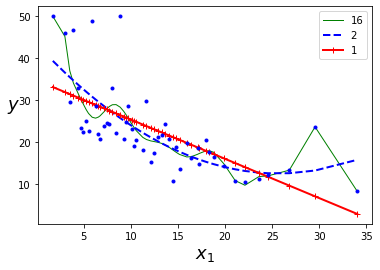

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 16), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X_poly_one, y_poly_one)
    y_newbig = polynomial_regression.predict(X_poly_one)
    plt.plot(np.sort(X_poly_one, axis=0), y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X_poly_one, y_poly_one, "b.", linewidth=3)
plt.legend(loc="upper right")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([-3, 3, 0, 10])

plt.show()

The graph shows three models with 1<sup>st</sup>-, 2<sup>nd</sup>- and 16<sup>th</sup>- degree polynomials. This time, the 16<sup>th</sup>-degree polynomial strongly wiggles around the data point and the overfitting is more severe.

## Sources of error

When we are build a model and it doesn't perform well (i.e. produces poor predictions) it would be helpful to some insight as to how to improve it.  It turns out that the difference between what our model predicts and the "right answer" (what we will call __error__) can be decomposed into three components we will call __noise__, __bias__, and __variance__. The first comes from the training data and the second two from our choice of model.

### Noise

Real world data is inherently noisy.  If we count the number of cars that go through an intersection over noon hour each workday we'll get a different number almost every time.  If we created a dataset with day of the week as $x$ and count as $y$ we would even have different values of $y$ for the same $x$.  So what does it even mean to say "the right value of $y$" in this case?  The problem is that we don't have enough detail to make a better prediction.  We could make a better prediction by recording the week number.  Better yet, if we had data about road closures, level of economic activity, etc. we could improve it further.  So in a sense you can think of the noise level as a measure of our ignorance: it is a term that bundles together all of the factors that we either don't know about, or if do we don't know what the value was at the time of the observation.  It also includes wrong values due to sensor or human mistakes.  If we're able to get better data, we may be able to reduce the noise and improve our model.  This means (1) finding additional independent variables that can be captured cost-effectively and are indeed predictive, (2) finding a better quality dataset, and/or (3) reducing recording and transcription mistakes, perhaps by automating the capture process or using better sensors.

In our housing example, what we are actually modelling is $y_i = w_0 + w_1 *x_i + \epsilon_i$ where $\epsilon_i$ is the noise in the $i$th observation in the dataset. Ordinarly least squares linear regression assumes that the noise is normally distributed and has zero mean. (There are other forms of regression that are collectively known as *general linear models* that are based on different assumptions about the noise but are beyond the scope of this course). The noise term epsilon will have a variance though. Noise error has nothing to do with our model nor our estimation procedure, only with our dataset, so this is called _irreducible error_ because we cannot get rid of it without getting better data.

### Bias

The other two sources of error are bias and variance, and these are both controllable through our choice of machine learning algorithm and its hyperparameters.

Bias is an assessment of how well a model can fit the true relationship between the feature variable(s) x and the target value y.

The points that we observed were a somewhat randomly selected snapshot of N houses that were sold, recorded, and that we tabulated in our data set. To illustrate the idea of bias, let's pick a very simple function, just a constant $y = w_0$. (What's the best fit? The mean of the observed prices!) Then, let's say another N houses were sold. The updated (now sized 2N) dataset we will have a somewhat different fit, but the two fits will be pretty similar if N was big enough.

If we were to get all possible data sets of size N, we would get the infinite set of fits. These fits will all be somewhat different but will be essentially normally distributed. We can calculate the variance and the average fit for this family of fits. If the model is too simple, there will be a large difference between the _true_ relationship and our average fit. This difference is called the __bias__. For a very simple model, the bias is large. We can increase the compexity of the model by including other terms (like $y_i = w_0 +w_1*x_i + w_2 *x_i^2 + ... + \epsilon_i$ for a polynomial fit or including other features into model). With higher model complexity, the bias will decrease; we will be getting closer to modelling the true relationship.  But as we will see it comes with a price.

### Variance

The **variance** of these fits is an indicator of the model's sensitivity. (Note that this is a different variance than the variance of the noise mentioned previously). This variance is a measure of the model’s sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and will thus overfit the training data.

If we start again our very simple model, including  only the constant term in our model ($\hat{y^{(i)}} = w_0$), then obviously this model will produce a rather poor result (again, just the average price), but if the data was swapped with a reasonably quantity of similar data, the model would not change its prediction by much. The coefficient value would change only a little, since our model has low sensitivity to the specific observations chosen. Next, let's add the linear term in our model $\hat{y^{(i)}} = w_0 + w_1 * x_1^{(i)}$. the model will produce a better fit and will become more sensitive to the specific data points. Rather than being a horizontal line as a function of $x$ it now is a little closer to the shape of the data cloud. If we continue to increase the model complexity by adding higher order terms the model becomes very sensitive to data and the curve will show increasingly fine details that will change if we swapped one set of observations with a similar set. With a sufficiently high-degree polynomial (one with a degree one less than the number of observations in the dataset), the fit would find a curve that includes each and every point. Now the model would be extremely sensitive to the data set. Changing any point in the dataset would cause the polynomial to change quite dramatically in order to still pass through all the points.  Between observations the values of the polynomial would probably be extremely different than any of the y values in the dataset, again so that the polynomial would be able to pass exactly through all the dataset points.  We would have low bias (it fits the training data exactly!) but very high variance.  It would be overfit and just as useless as our high bias constant-term model.

### The Bias-variance tradeoff

Low complexity models have high bias, as these are far from the ideal fit, but they also have low variance. Increasing a model's compexity leads to higher variance but lower bias as the relationship between $x_i$ and $y$ can be better approximated. This is called bias-variance tradeoff.  If the bias decreases with complexity, and the variance increases, there may be an optimal spot or degree of model complexity where both bias and variance are reasonably low. 

Unfortunately bias and variance cannot be computed to allow us to find the sweet spot. Variance was introduced and defined in terms of all possible datasets and the bias is defined as the difference between produced fits and the _true_ fit. We have no way to get all possible dataset and we do not know what the true fit is (or we wouldn't need a predictive model!).

However, it can be shown mathematically that Mean Square Error is the sum of the bias squared, the variance and the noise:

$$\text{MSE} = \text{bias^2} + \text{variance} + \text{noise}$$

We can't do anything about the noise given the dataset we have, but we can adjust the others. Building a high performance model then essentially means finding the level of complexity (i.e. the degree of polynomial or selecting the most representative features) such that both bias and variance give minimal contribution to the mean square error. Optimizing a model (as distinct from fitting a model) means finding a kind of model that minimizes the MSE, or in other words balances between bias and variance in the most practical way.  (The complexity of a model is sometimes also sometimes called the *power* of the model).

## Overfitting in multi-variable linear regression

The examples above demonstrated overfitting for polynomial regression. When we increased model complexity i.e. the degree of the polynomial, the model became too sensitive or specific to the given training dataset. We say it did not "generalize" well. However, the issue of overfitting also appears in multi-variable first-order linear regression models. The risk of overfitting increases as we increase the number of inputs. Having many features introduces many degrees of freedom or too much flexibility into the model and the model can again become too powerfuln for the amount of data it was trained on.

Whether overfitting occurs depends on the model complexity (in ths case, the number of predictors used) relative to the size of the dataset (specifically, the number of observations in the dataset). If we have a small dataset with few observations, then our models can easily become overfit to the data. The effect is similar to increasing the order of the polynomial: with enough terms in the model it becomes very easy to hit all of our observations, but at input values in between where we have those observations, the predictions can become wildly wrong.

## Feature selection approaches

There are several approaches to improve the _prediction accuracy_ and _interpretablity_ of the model.

Provided that the true relationship is approximately linear, a simple linear model will have low bias. If the number of observationx $n$ is much larger than the number of features $m$, $n >> m$, then the linear model tends to also have low variance. As we've seen however, if n is not much larger than $m$ there can be a lot of variance, resulting in overfitting. In this case by _constraining_ or _shrinking_ the estimated coefficients, we can substantially reduce the variance. This can lead to substantial improvements in the model accuracy.  The strategy here is that if can keep the weights in our prediction function as small as possible the function won't be able to "wave around" so much.  Large excursions of the function away from the x-axis require large weight values.

It is often the case that some variables used in a multiple regression are not associated with the response or their influence on the response is negligible. Keeping these irrelevant variables leads to unnecessary complexity in the predicting model. By removing these variables - by setting the corresponding coefficient estimates to zero - we can obtain a model that is more easily interpreted and will have low variance. This is called _feature selection_.

Let's say we have a model with $p$ predictors. There are three important classes of feature selection methods:

- **Subset selection**: This approach involves identifying a subset of the $p$ predictors that are most related to the response, then the linear model is fitted on this reduced set of variables.


- **Shrinkage**: In this approach the model keeps all $p$ predictors. However, the estimated coefficients are constrained. This coefficient shrinkage towards zero (known as *regularization*) has the effect of reducing variance. Shrinkage can be performed automatically with Lasso Regression described at the end of this module.


- **Dimensionality reduction**: This approach involves _projecting_ the $p$ predictors into a smaller $M$-dimensional subspace, where $M < p$. This is achieved by computing $M$ different *linear combinations*, or *projections*, of the variables. Then these $M$ projections are used as predictors to fit a model. Dimensionality reduction will be the focus of the next module, Module 6.

### Subset selection

Two main approaches to subset selection are the **all subsets** and **stepwise selection** methods.

#### All subsets

To perform an all subsets selection we fit a separate model for each possible combination of the $p$ predictors. That will include the fit of:
- all $p$ models that contain exactly one predictor,
- all $p(p-1)/2$ models with exactly two predictors, and so forth.
Then, we evaluate all of the resulting models to identify the best performer. As before, we wish to choose a model with low *test* error. 

**All subsets** model selection is a conceptually simple approach, but it suffers from high computational cost. The number of possible models that must be considered grows rapidly as $p$ increases. In total there are $2^p$ models that involve subsets of $p$ predictors. If $p=10$ there are approximetely 1,000 possible models to be trained and evaluated. The all subsets selection becomes computationally infeasible for values of $p$ greater than about 40. Also, for a large space of alternative candidate models the chance of finding a model that performs well on the test set just by dumb luck becomes high. This enormous search can lead to overfitting and high variance of the coefficients.

#### Stepwise Selection

Stepwise selection methods offer an alternative, computationally efficient approach, where much smaller sets of models are considered.

**Forward stepwise selection** begins with a model containing no predictors, and then adds predictors to the model, one-at-a-time, until all of the predictors are in the model. At each the step only the variable that gives the greatest improvement to the fit is added to the model. Here is the schedule:

* start with no predictors - call this model $M_0$,
* consider p models wirh exactly one variable and pick the best performer - model $M_1$,
* consider $p-1$ models that augment the predictor in $M_1$ with one additional from the $p-1$ remaining predictors, and so forth.

Unlike all subsets selection, which involves fitting $2^p$ models, forward stepwise selection involves fitting $p - k$ models in the $k^{th}$ iteration and one initial model with no predictor. In total $\sum_{k=0}^{p-1}(p-k) = 1+p(p+1)/2$ models are fitted. This represents a substantial computational advantage.

There is also **backward stepwise selection**, where we begin with the model containing all $p$ predictors, and then iteratively remove the least useful predictor, one-at-a-time.

Again, it would be difficult to pick the best model from a pool based on the training error. The training error will likely decrease with more predictors in the model. It is recommended to compute the predicting error for the test portion of the dataset or use a cross-validation check.

Unfortunately, stepwise selection (either backward or forward) may entirely miss the best model.  It may be one of the ones that all subsets would test but never gets tried when doing stepwise. All subsets does an exhaustive search whereas stepwise does a restricted search that usually produces good results in practice, but does not guarantee the best possible results.

Often you need to write some short code to implement these iterative selection processes. Some Scikit-Learn classes though have methods to find the most important feature. For example, `RandomForestRegressor` has the method `feature_importance_`, which helps to identify the most important features in the dataset, those that explain the most variance. Below is an example of this approach with Random Forest regression.

Text(0.5, 0, 'Relative Importance')

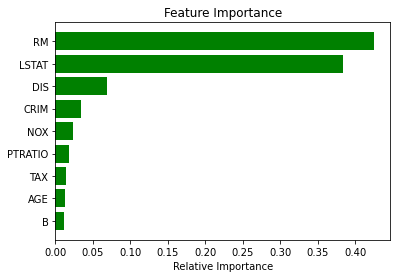

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)

model.fit(boston_df[boston.feature_names], boston_df['PRICE'] )

importances = model.feature_importances_
indices = np.argsort(importances)[-9:]

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [boston.feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

## Regularization

It was demonstrated that it is very difficult to build a very complex model using a training set of limited size. In the polynomial regression example we could not use a high degree polynomial for a smaller training dataset; increasing model complexity led to overfitting. Feature selection was introduced as a practical approach to avoid overfitting. It is rather unsatisfying that the model complexity or the number of parameters has to be limited according to the size of the available data set. We would prefer the model complexity be chosen according to the complexity of the problem.

There is another way to reduce overfitting, which is to _regularize_ the model. In the case of polynomial fit, we saw the actual reason for the overfit was that the model weight coefficients $w_i$ got too large and as a result the fit curve was too wiggly; the curve oscillated too much between points. Overfit could have been avoided if the weight coefficients were constrained. This is the basic idea of regularization methods &mdash; by constrainting coefficients, a polynomial fit can be achieved while still keeping the curve smooth. Constraints imposed on the model reduce its degrees of freedom and it becomes harder to overfit the data.

The same idea can be applied to a linear model, where overfit happens when too many features are included; again,  regularization is achieved in the same way, by constraining the weights of the model. We will look at three different ways to constain the weight coefficients: Ridge Regression, Lasso Regression, and Elastic Net.

The constraints on the weight coefficients can be introduced by modifying the cost function we minimize when finding the best fit. We previously introduced the cost function for a linear model as the sum of squared residuals (the difference between actual target values and the predicted target values). Our quality metric just depended on the difference between our predicted house sales price, and our actual house sales price. We're considering just the residual sum of squares as the measure of the goodness of the fit. But now, the quality metric is going to be modified to also take into account a measure of the complexity of the model. This way there is going to be a balance between how well the function fits the data and a measure of how complex, or how potentially overfit, the model is. We will use the magnitude of our estimated weight coefficients $w_j$ as the measure of how complex our model has become. 

### Ridge Regression

**Ridge Regression** (also called **Tikhonov regularization**) is a regularized version of linear regression: a regularization term equal to $\alpha \sum_{i=1}^{n}{w^2}$ is added to the cost function. The cost function then takes the form:
$$J(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{w^2}$$

This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. The cost now also goes up with the square of the sum of the weights so gradient descent will seek to find the best compromise.

Note that the intercept term $w_0$ is not regularized (the sum starts at i = 1, not 0). If we define $w$ as the vector of feature weights ($w_1$ to $w_k$), then the regularization term is simply equal to $1⁄2(∥ w ∥^2)$, where $∥ w ∥^2$ represents the L2 norm of the weight vector (called L2 because we are squaring the weights).

The hyperparameter $\alpha$ controls how much you want to regularize the model. $\alpha$ can have any value $>=$ 0. If $\alpha = 0$ then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean i.e. the model will always just predict the average of the target variable values it was trained on.

Note also that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

It's also important with ridge regression to scale the data whereas it isn't really required for ordinary linear or polynomial regression. `StandardScaler` is usually a good choice when using sklearn. We're assuming here that the data has already been scaled or normalized.

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [23]:
ridge_reg.coef_

array([-1.04595278e-01,  4.74432243e-02, -8.80467889e-03,  2.55239322e+00,
       -1.07770146e+01,  3.85400020e+00, -5.41453810e-03, -1.37265353e+00,
        2.90141589e-01, -1.29116463e-02, -8.76074394e-01,  9.67327945e-03,
       -5.33343225e-01])

### Lasso Regression

Another method of Linear model regularization is _Least Absolute Shrinkage and Selection Operator Regression_ (called Lasso Regression). Similar to Ridge Regression, it adds a regularization term to the cost function, but this time the L1 norm $\alpha \sum_{i=1}^{n}{|w|}$ of the weight vector is used instead of half the square of the L2 norm.
The Lasso Regression cost function is:

$$J(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{|w|}$$

The most important feature of Lasso Regression is that it completely elimimates the weights $w_j$ of the least important features. In the case where a feature $k$ has very low importance or influence on the target value, the $\text{MSE}(w_k)$ part would be very low and the cost function for that feature will be driven mostly by the regularization term $\alpha {|w_k|}$ and thus the weight $w_k$ will be forced to zero.

In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 10)
lasso_reg.fit(X, y)

Lasso(alpha=10)

In [25]:
lasso_reg.coef_

array([-0.        ,  0.02614602, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00928242,
       -0.        ,  0.00749584, -0.56403807])

It is remarkable that Lasso Regression tends to completely eliminate the weights of the least important features. Lasso Regression automatically performs feature selection!

To explain why this is the case, let's consider both Ridge and Lasso Regressions for a two-dimensional problem, where the task is to find the best value for coefficients $w_1$ and $w_2$. In the figure below, the ellipses represent the MSE part of the cost function.  This is the contour plot of the two-dimensional quadratic function of $w_1$ and $w_2$. The dot in the centre of the ellipses marks the unregularized solution (bottom of the valley). This solution corresponds to $\alpha=0$. The diamond and the circle represent the lasso and ridge regression constraints, respectively. Both are centered at zero and thus the solution to the cost function with the regularization part would only be $w_1 = w_2 =0$.  

The ellipses represent regions of constant MSE. Everywhere along the contour line, the value of MSE is constant. The closer to the center, the MSE value is getting smaller; as the ellipses expand away from the center, the MSE value increases. For any finite value of the regularization parameter $\alpha$ the lasso and ridge regression coefficient estimates are given by the first point at which an ellipse contacts the constraint region. The size of the constrained region is set by the parameter $\alpha$. The larger the $\alpha$ value the more tightly the parameter is constrained around zero. For small values of $\alpha$ the constained region is not so tight, it covers a larger area and the regression coefficient values will be close to those given by the MSE solution.

Since ridge regression has a circular constraint, the intersection with the ellipses will not generally occur on an axis; the ridge coefficients are just pulled from the MSE central point towards zero; but they will be non-zero. The lasso constraint has corners at each of the axes though so the ellipses will often intersect the constraint region at an axis. When this occurs, one of the coefficients will be exactly zero.  In the diagram we can see tha $w_1$ is 0. 

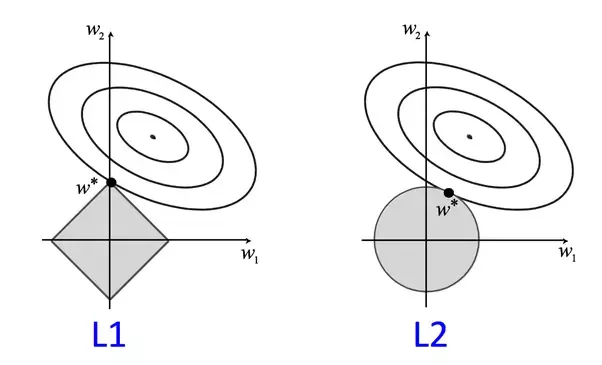

**End of Module**

This notebook makes up one part of this module. Now that you have completed this part, please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

# References

Bishop, C.M. (2006) Pattern Recognition and Machine Learning. Springer. https://www.microsoft.com/en-us/research/publication/pattern-recognition-machine-learning/

James, G., Witten, D., Hastie, T., Tibshirani, R. (2017) An Introduction to Statistical Learning. Springer. https://www.springer.com/us/book/9781461471370